In this project, we are going to build a predictive model for identifying the Surge Price Category for every trip made. The Dataset was sourced from AnalyticsVidhya Janta Hack - Mobility Analytics Hackathon. We shall also analyze the factors that influence the outcome of the Sure Price Category Prediction



In [26]:
import pandas as pd
df = pd.read_csv("mobility_data.csv")

In [27]:
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [28]:
df.shape

(131662, 14)

In [29]:
df.dtypes

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object

Let's look at the distribution of the Target Variable( Surge_Pricing_Type)


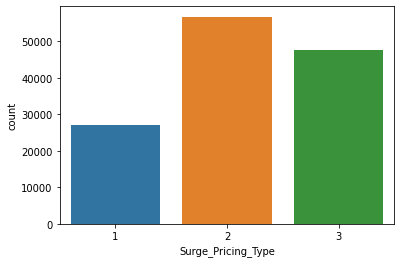

In [30]:
import seaborn as sns
import pandas.util.testing as tm
sns.countplot(df['Surge_Pricing_Type'])

The Surge Pricing Type 1 has a trip count relatively lower than Type 2 and Type 3. Hence we will treat the imbalanced class with Adasyn technique that will be done in the later stages in this notebook.



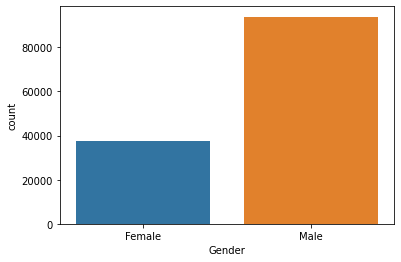

In [31]:
#Distribution of Gender by Trips
sns.countplot(df['Gender'])


The trips had a Gender Ratio of 3:1(Male: Female)


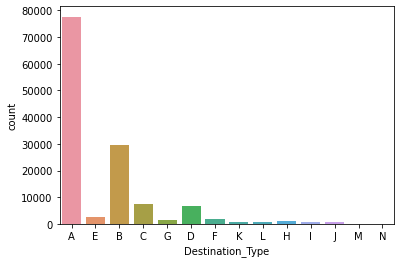

In [32]:
#Number of trips made per Destination
sns.countplot(df['Destination_Type'])

The number of trips made were significantly high to Destination A. Trips to other destinations were very less in comparison to trips made to Destination A.


Let's answer some Business Questions :


1) What is the Average Trip Distance across the different Surge Price Category?

2) What is the Surge Price Type Proportion across different Cab Types?

3) What is the Average Customer Rating across different Surge Price Category?



In [33]:
#Average Trip Distance across the different Surge Price Category
df.groupby(['Surge_Pricing_Type']).agg({'Trip_Distance':'mean'})

,Trip_Distance
Surge_Pricing_Type,
1,41.061633
2,41.269265
3,49.476234


The Average Trip Distance were about 41 kms for the Types 1 and 2, but was at 50 kms for the Type 3.


In [34]:
#Surge Price Type Proportion across different Cab Types
pd.crosstab(df['Type_of_Cab'],df['Surge_Pricing_Type']).apply(lambda r: r/r.sum(), axis=1)

Surge_Pricing_Type,1,2,3
Type_of_Cab,,,
A,0.691548,0.104687,0.203765
B,0.157952,0.766059,0.075989
C,0.036875,0.614821,0.348304
D,0.056079,0.132221,0.811700
E,0.092230,0.186694,0.721076


In [35]:
#Average Customer Rating across different Surge Price Category
df.groupby(['Surge_Pricing_Type']).agg({'Customer_Rating':'mean'})



,Customer_Rating
Surge_Pricing_Type,
1,3.112791
2,2.857688
3,2.689500


Surging Pricing Type 1 had the Highest Average Customer Rating at 3.11 while the Type 3 had the Lowest Average Customer Rating at 2.69.


In [36]:
#Missing Value Analysis
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values(by='percent_missing', ascending=False, inplace=True)

In [37]:
missing_value_df

,column_name,percent_missing
Var1,Var1,53.948748
Type_of_Cab,Type_of_Cab,15.349911
Life_Style_Index,Life_Style_Index,15.336999
Confidence_Life_Style_Index,Confidence_Life_Style_Index,15.336999
Customer_Since_Months,Customer_Since_Months,4.496362
Trip_ID,Trip_ID,0.000000
Trip_Distance,Trip_Distance,0.000000
Destination_Type,Destination_Type,0.000000
Customer_Rating,Customer_Rating,0.000000
Cancellation_Last_1Month,Cancellation_Last_1Month,0.000000


In [38]:
df.dtypes

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object

We shall remove Var 1 as it contains 50% missing values. The missing values in the Categorical data will be imputed with 999 and the missing values in continuoys variable will be imputed their respective mean values.



In [39]:
df['Life_Style_Index'] = df['Life_Style_Index'].astype(float)


In [40]:
df['Type_of_Cab'].fillna("999",inplace=True)
df['Life_Style_Index'].fillna(df['Life_Style_Index'].mean(),inplace=True)
df['Confidence_Life_Style_Index'].fillna("999",inplace=True)
df['Customer_Since_Months'].fillna(df['Customer_Since_Months'].mean(),inplace=True)


In [41]:
import pandas as pd
del df['Trip_ID']
del df['Var1']
df_dummies = pd.get_dummies(df)

In [42]:
df_dummies.shape

(131662, 34)

In [43]:
Y = df_dummies['Surge_Pricing_Type']
del df_dummies['Surge_Pricing_Type']

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_dummies, Y, test_size=0.3, random_state=1)

Now, using the ADASYN technique to overcome the imbalanced class problem


In [46]:
from imblearn.over_sampling import ADASYN

x_res, y_res = ADASYN(sampling_strategy='minority').fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Let's build a Random Forest Model on the Synthesised Data(ADASYN) with 500 Trees and test the model results on the testing dataset



In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
rf = RandomForestClassifier(n_estimators=100)

In [49]:
rf.fit(x_res, y_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
y_pred_rf = rf.predict(x_test)
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

              precision    recall  f1-score   support

           1       0.72      0.56      0.63      8227
           2       0.67      0.78      0.72     17047
           3       0.71      0.66      0.68     14225

    accuracy                           0.69     39499
   macro avg       0.70      0.67      0.68     39499
weighted avg       0.69      0.69      0.69     39499



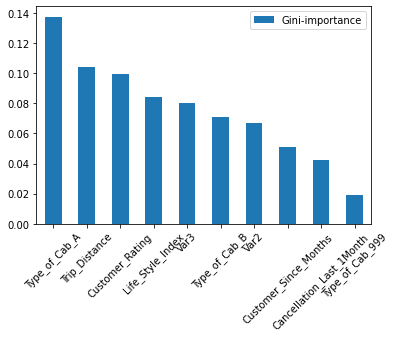

In [52]:
import pandas as pd
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_train.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.head(10).sort_values(by='Gini-importance', ascending=False).plot(kind='bar', rot=45)

Conclusion :
In this project, we built a predictive model to classify trips according the Surge Pricing Type and identify the factors that impacted the model. The model gave a weighted accuracy of 69% and the important features were identifed. The Cab Type A, Trip Distance and Customer Rating were the major features affecting the model outcome. 